### Data Analysis

In [2]:
options(warn=-1)
suppressWarnings({
    libs <- c("tidyverse")
load.libs <- function(x){
  for(i in x){
    if(!require(i,character.only = TRUE )){
      install.packages(i,dependencies = TRUE )
      library(i,character.only = TRUE )
    }
  }
}
load.libs(libs)
})

In [3]:
data<-read.csv("data/clustered_data.csv", header = T)
head(data)

X,track_name,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,Apologize,Pop,0.348,0.591,0.718,1.18e-04,0.107,-6.025,0.0368,117.995,0.4680,Cluster 1
1,Mercy,Pop,0.133,0.568,0.686,0.00e+00,0.110,-4.901,0.0903,148.294,0.4000,Cluster 3
2,1950,Pop,0.648,0.600,0.535,4.70e-06,0.162,-7.043,0.1070,71.912,0.2690,Cluster 4
3,Perfect Duet (Ed Sheeran & BeyoncÃ©),Pop,0.779,0.587,0.299,0.00e+00,0.123,-7.365,0.0263,94.992,0.3560,Cluster 2
4,Stay With Me,Pop,0.568,0.479,0.419,2.17e-04,0.110,-6.517,0.0389,85.014,0.1860,Cluster 4
5,Nevermind,Pop,0.159,0.601,0.688,1.29e-05,0.414,-8.374,0.2020,99.933,0.0793,Cluster 2


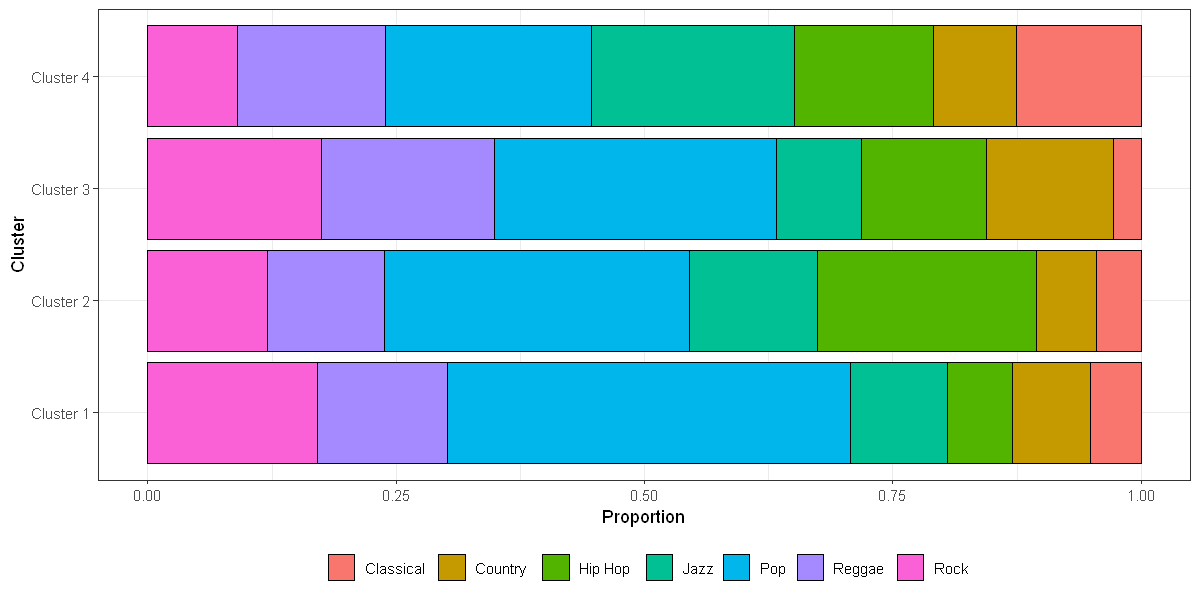

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5)
data%>%
    ggplot()+
    geom_bar(aes(cluster,  group = genre, fill = genre), color = "black", position = "fill")+
    coord_flip()+
    theme_bw()+
    labs(x = "Cluster", y = "Proportion")+
    theme(legend.title = element_blank(),
          legend.position = "bottom")+
    guides(fill = guide_legend(nrow = 1))

In [5]:
a<-data%>%
    select(-c("X", "track_name", "genre"))%>%
    group_by(cluster)%>%
    summarise_all("mean")
a[,-1]<-round(a[,-1],2)
a

cluster,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Cluster 1,0.27,0.63,0.63,0.13,0.18,-7.99,0.07,127.61,0.53
Cluster 2,0.26,0.66,0.66,0.11,0.19,-7.53,0.11,99.57,0.56
Cluster 3,0.23,0.56,0.67,0.10,0.19,-7.25,0.12,160.85,0.57
Cluster 4,0.41,0.56,0.50,0.25,0.17,-10.16,0.11,79.68,0.49
